In [1]:
################## CODE BLOCK 1 ###############################################
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
########### Importing modules #################################################
import model as Model
import utils as Utils


In [3]:
################# CODE BLOCK 2 ################################################
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [4]:
################ CODE BLOCK 4 #################################################
train_data = datasets.MNIST('../data', train=True, download=True, transform=Utils.train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=Utils.test_transforms)

In [5]:
############### CODE BLOCK 5 ##################################################
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

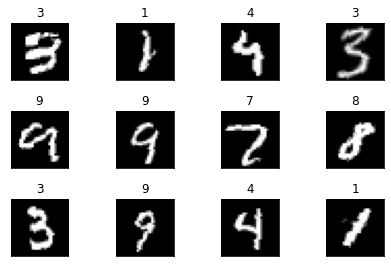

In [6]:
########### CODE BLOCK 6 ######################################################
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [7]:
############## CODE BLOCK 7 ###################################################
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Model.Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [8]:
############### CODE BLOCK 8 ##################################################
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [ ]:
############### CODE BLOCK 10 #################################################
model =Model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_losses_, train_acc_ = Utils.train(model, device, train_loader, optimizer, criterion)#,train_losses=train_losses,train_acc=train_acc)
  test_losses_, test_acc_ = Utils.test(model, device, test_loader, criterion)#,test_losses=test_losses,test_acc=test_acc)
  scheduler.step()

  train_losses.append(train_losses_)
  train_acc.append(train_acc_)
  test_losses.append(test_losses_)
  test_acc.append(test_acc_)

  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.2710, Accuracy: 9189/10000 (91.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0882, Accuracy: 9726/10000 (97.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0687, Accuracy: 9778/10000 (97.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0617, Accuracy: 9789/10000 (97.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0430, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0404, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0367, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0347, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0656 Batch_id=12 Accuracy=98.30:  11%|███▋                              | 13/118 [01:04<08:09,  4.66s/it]

In [ ]:
train_losses

In [ ]:
############# CODE BLOCK 11 #################################################################
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")